
<div class="alert alert-block alert-info">
<h1> Ampliando la mirada: variables por parejas </h1>
</div>

### Rafa Caballero

# Tabla de Contenidos
1. [Gráficas con dos variables continuas](#1.-Gráficas-con-dos-variables-continuas)<br>
   1.1 [Diagrama de dispersión](#1.1-Diagrama-de-dispersión)<br>
   1.2 [Diagrama de líneas](#1.2-Diagrama-de-líneas)<br>
   1.3 [Diagrama de densidad](#1.3-Diagrama-de-densidad)<br>
2. [Gráficas con dos variables discretas](#2.-Gráficas-con-dos-variables-discretas)<br>
   2.1 [Diagrama de barras](#2.1-Diagrama-de-barras)<br>
   2.2 [Mapas de calor](#2.2-Mapas-de-calor)<br>

3. [Gráficas con una variable discreta y otra continua](#3.-Gráficas-con-una-variable-discreta-y-otra-continua)<br>
   3.1 [Gráficos de enjambre](#3.1-Gráficos-de-enjambre)<br>
   3.2 [Gráficos de violín](#3.2-Gráficos-de-violín)<br>
   3.3 [Diagramas de barras con IC](#3.3-Diagramas-de-barras-con-IC)<br>
   
4. [Correlaciones](#4.-Correlaciones)<br>
    4.1 [Introducción](#4.1-Introducción)<br>
    4.2 [Definición](#4.2-Definición)<br>
    4.3 [Ejemplo](#4.3-Ejemplo)<br>
    4.4 [A tener en cuenta](#4.4-A-tener-en-cuenta)<br>
    4.5 [Representación gráfica](#4.5-Representación-gráfica)<br>
    4.6 [Variables nominales](#4.6-Variables-nominales)<br>
5. [Referencias](#5.-Referencias)<br>
   

In [1]:
modules = ["scipy","tqdm","yfinance"]

import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando módulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")
            try:
                r = check_call([sys.executable, "-m", "pip", "install", "--user", m])
                print("¡hecho!")
            except:
                print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")

    print("¡Terminado!")

instala(modules)

Instalando módulos
scipy  encontrado
tqdm  encontrado
yfinance  No encontrado, instalando...¡hecho!
¡Terminado!


## 1. Gráficas con dos variables continuas
---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

import yfinance as yf
import pandas as pd

# Definir los símbolos de Yahoo Finance, incluyendo General Electric y Visa
symbols = {
    'USD/JPY': 'JPY=X',
    'EUR/USD': 'EURUSD=X',
    'Amazon': 'AMZN',
    'Alphabet': 'GOOGL',
    'Pfizer': 'PFE',
    'Nvidia': 'NVDA',
    'Tesla': 'TSLA',
    'General Electric': 'GE',
    'Visa': 'V'
}

# Descargar los datos de todos los símbolos
data = yf.download(list(symbols.values()), period="max")

# Filtrar para quedarnos solo con la columna 'Adj Close'
df = data['Close'].dropna()

# Nombres inteligibles
symbol_renames = {v: k for k, v in symbols.items()} # diccionario inverso
df = df.rename(columns=symbol_renames)
# Añadir una columna con el día de la semana
df["Date"] = df.index
filtro_fecha = df.Date.dt.year >= 2011
df = df[filtro_fecha]
df["Year"] = df.Date.dt.year
df['Day_of_Week'] = df['Date'].dt.day_name()


# Guardar los datos en un archivo CSV si es necesario
#df.to_csv('close_varios.csv', index=False)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed


Ticker,Amazon,EUR/USD,General Electric,Alphabet,USD/JPY,Nvidia,Pfizer,Tesla,Visa,Date,Year,Day_of_Week
Date,,,,,,,,,,,,
2011-01-03,9.211000,1.335791,65.457275,15.051910,81.123001,0.362674,9.425338,1.774667,15.882467,2011-01-03,2011,Monday
2011-01-04,9.250500,1.335684,66.638939,14.996370,81.669998,0.361528,9.590600,1.778000,15.900482,2011-01-04,2011,Tuesday
2011-01-05,9.371000,1.332108,66.746353,15.169468,82.038002,0.389267,9.654573,1.788667,16.236069,2011-01-05,2011,Wednesday
2011-01-06,9.293000,1.315686,66.459892,15.279800,83.189003,0.443141,9.691892,1.858667,16.479300,2011-01-06,2011,Thursday
2011-01-07,9.274500,1.297993,65.994370,15.353024,83.300003,0.455520,9.777186,1.882667,16.432011,2011-01-07,2011,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,200.990005,1.128184,232.789993,168.470001,143.858002,131.289993,23.320000,339.339996,353.540009,2025-05-23,2025,Friday
2025-05-27,206.020004,1.138848,241.779999,172.899994,142.654999,135.500000,23.610001,362.890015,359.299988,2025-05-27,2025,Tuesday
2025-05-28,204.720001,1.133710,243.669998,172.360001,144.177002,134.809998,23.180000,356.899994,359.730011,2025-05-28,2025,Wednesday


### 1.1 Diagrama de dispersión

Son los típicos gráficos de puntos

**matplotlib**

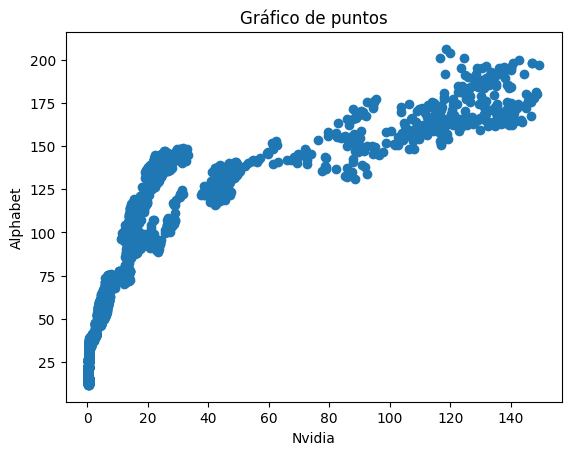

In [ ]:
import matplotlib.pyplot as plt

# puntos        X                     Y
plt.scatter(df['Nvidia'], df['Alphabet'])
plt.xlabel('Nvidia')  # esto son decoraciones, no es imprescindible
plt.ylabel('Alphabet')
plt.title('Gráfico de puntos')
plt.show() # aquí termina el gráfico

Tamaño de punto, parámetro `s`

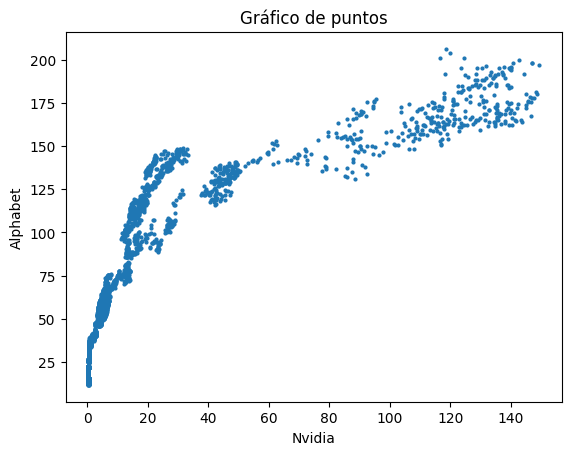

In [ ]:
import matplotlib.pyplot as plt

# puntos        X                     Y
plt.scatter(df['Nvidia'], df['Alphabet'],s=4)  # tamaño del punto
plt.xlabel('Nvidia')  # esto son decoraciones, no es imprescindible
plt.ylabel('Alphabet')
plt.title('Gráfico de puntos')
plt.show()

Si queremos alterar aspecto podemos darle un tamaño determinado

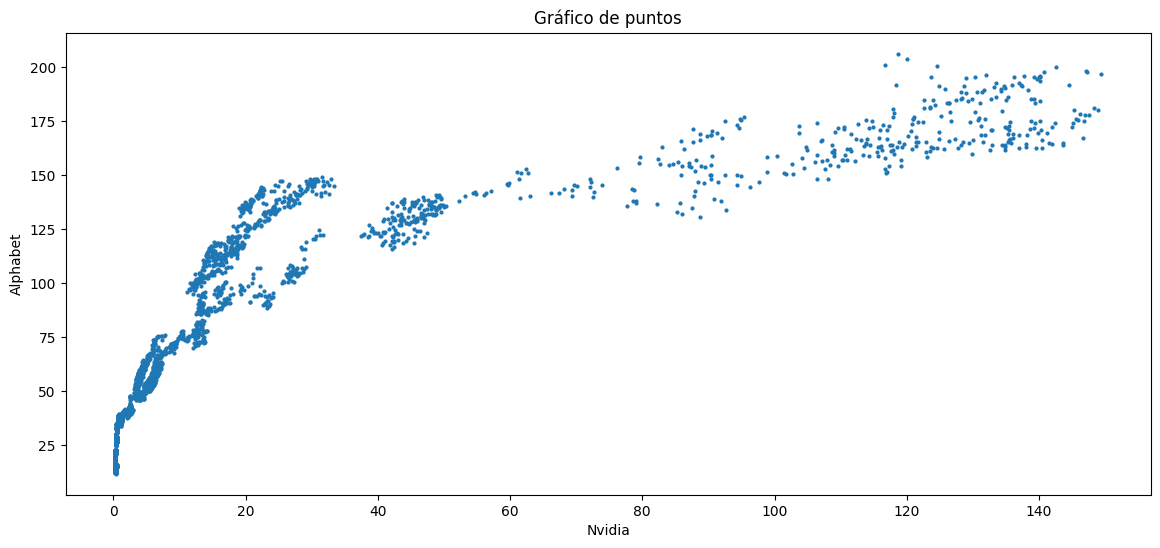

In [ ]:

fig = plt.figure(figsize=(14,6))
plt.scatter(df['Nvidia'], df['Alphabet'],s=4)  # tamaño del punto
plt.xlabel('Nvidia')  # esto son decoraciones, no es imprescindible
plt.ylabel('Alphabet')
plt.title('Gráfico de puntos')
plt.show()

Fig tiene la ventaja de que nos permite por ejemplo grabar el gráfico

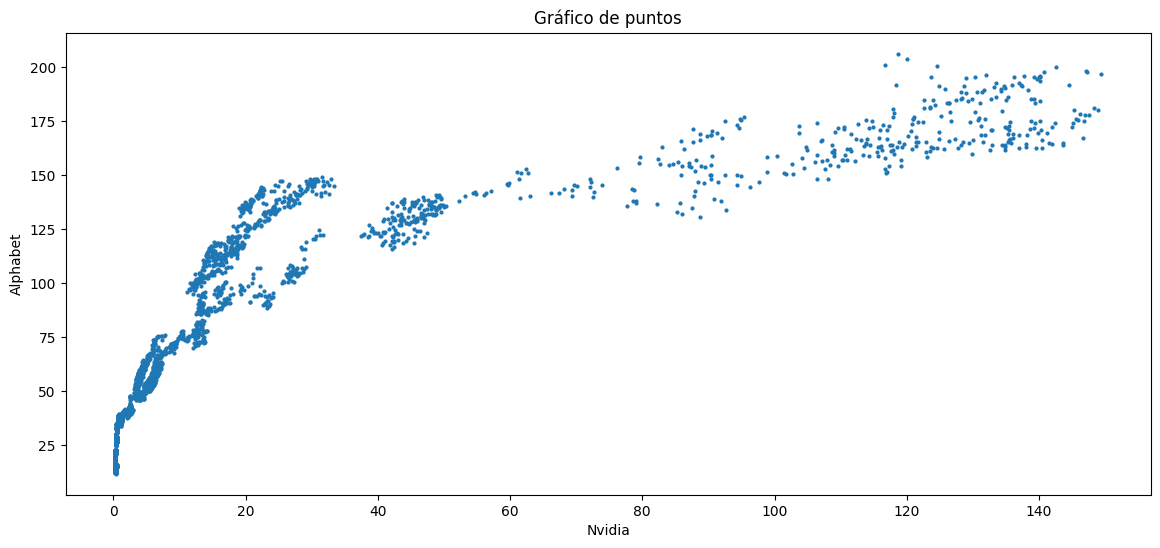

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.scatter(df['Nvidia'], df['Alphabet'],s=4)  # tamaño del punto
plt.xlabel('Nvidia')  # esto son decoraciones, no es imprescindible
plt.ylabel('Alphabet')
plt.title('Gráfico de puntos')
fig.savefig("Nvidia_Alphabet.png")
plt.show()

Para hacer dos gráficos en matplotlib, podemos usar `subplots'

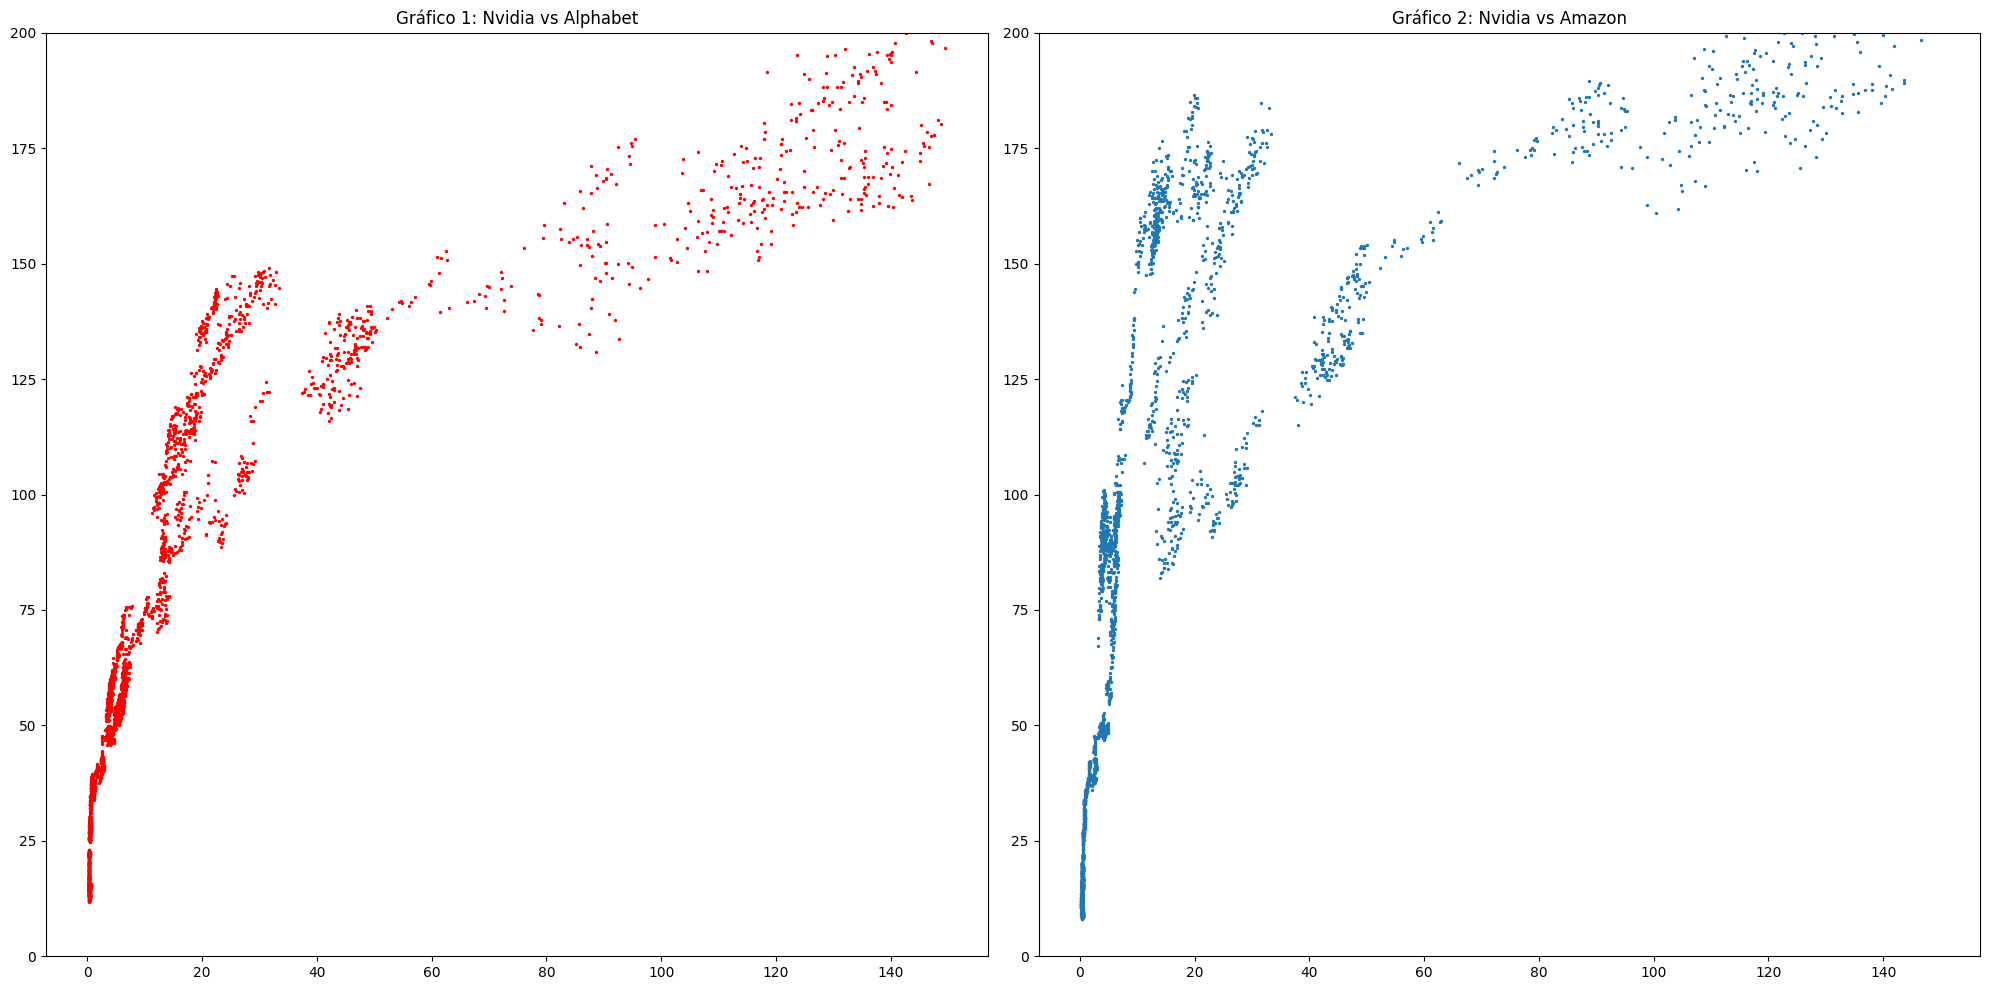

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5*2)) # 2 filas, una columna, ax1 es el primero, ax2 el segundo
ax1.scatter(df['Nvidia'], df['Alphabet'],s=2,color="red")
ax1.set_title('Gráfico 1: Nvidia vs Alphabet')
ax1.set_ylim(0, 200)

ax2.scatter(df['Nvidia'], df['Amazon'],s=2)
ax2.set_title('Gráfico 2: Nvidia vs Amazon')
ax2.set_ylim(0, 200)
plt.tight_layout()
plt.show()

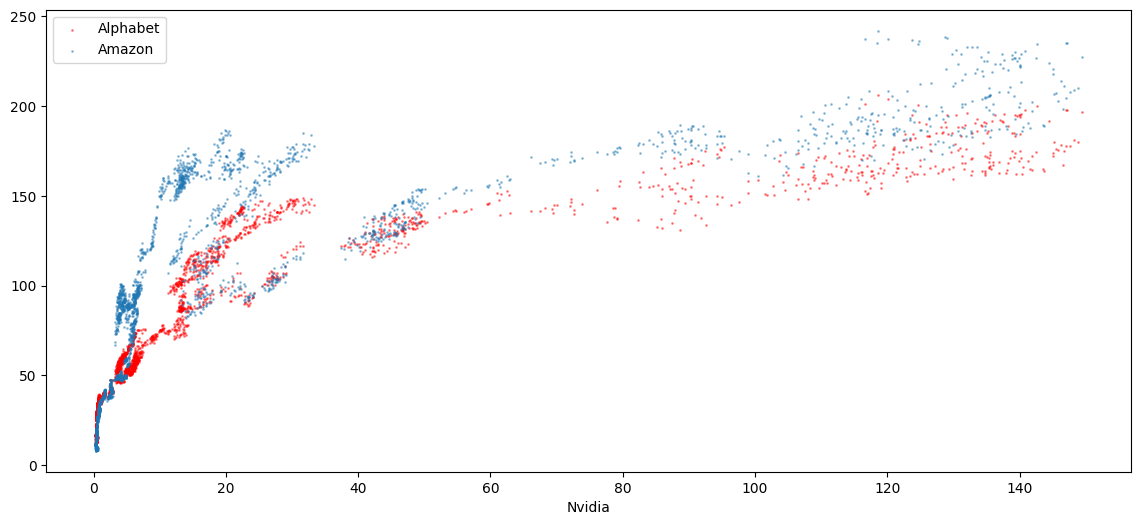

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.scatter(df['Nvidia'], df['Alphabet'],s=1,alpha=0.4,color="red", label="Alphabet")
plt.scatter(df['Nvidia'], df['Amazon'],s=1,alpha=0.4, label="Amazon" )
plt.xlabel("Nvidia") # la X es la misma en los dos casos
plt.legend()
plt.show()

**Pandas**


<Axes: xlabel='Alphabet', ylabel='Amazon'>

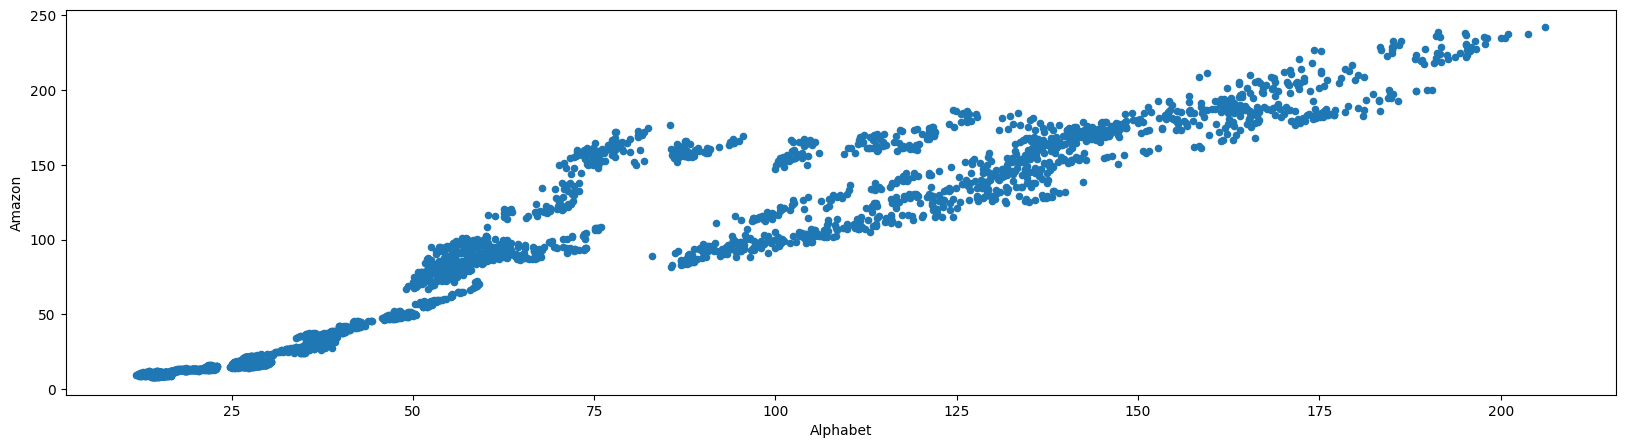

In [ ]:
df.plot(kind="scatter", x="Alphabet", y="Amazon", figsize=(20,5))

**seaborn**

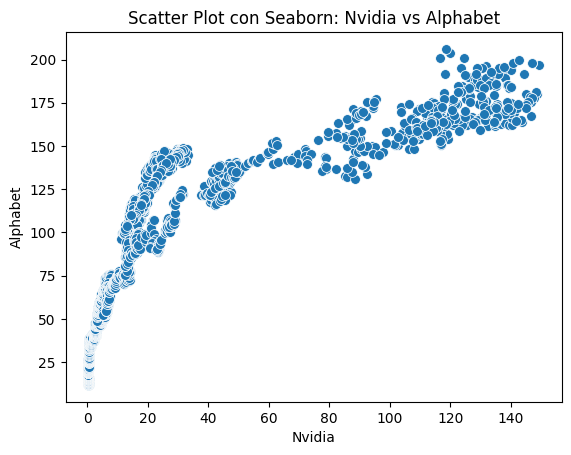

In [10]:
import seaborn as sns
sns.scatterplot(x='Nvidia', y='Alphabet', data=df,  s=50)

# Añadir título y mostrar el gráfico
plt.title('Scatter Plot con Seaborn: Nvidia vs Alphabet')
plt.show()


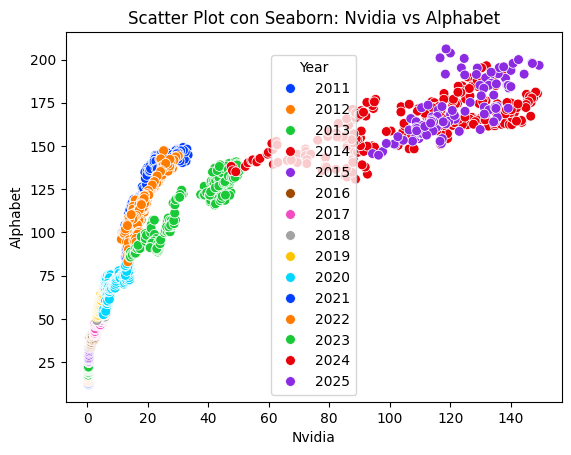

In [11]:
import seaborn as sns
sns.scatterplot(x='Nvidia', y='Alphabet', data=df,  hue="Year", palette="bright", s=50)

# Añadir título y mostrar el gráfico
plt.title('Scatter Plot con Seaborn: Nvidia vs Alphabet')
plt.show()


**plotly**

In [12]:
import plotly.express as px
fig = px.scatter(df, x='Nvidia', y='Alphabet', title="Scatter Plot con Plotly")
fig.show()

Podemos añadir más infromación con `hover_data`

In [13]:
import plotly.express as px
fig = px.scatter(df,x='Nvidia', y='Alphabet', title="Scatter Plot con Plotly", hover_data=['Date'])
# Personalizar el tamaño y color
fig.update_traces(marker=dict(size=4, color='red'))
fig.show()

### 1.2 Diagrama de líneas

El más común, pero en el caso de dos variables exige que una de ellas esté ordenada y que no tenga repeticiones sino queremos obtener un caos



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/f1-Singapur24.csv"
f1 = pd.read_csv(url)
f1

,Driver,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Position,Deleted,DeletedReason,FastF1Generated
0,NOR,100.424,1.0,0,NaN,41.379,27.852,186.0,MEDIUM,1.0,McLaren,1.0,False,NaN,False
1,NOR,98.480,2.0,0,29.268,41.412,27.800,276.0,MEDIUM,2.0,McLaren,1.0,False,NaN,False
2,NOR,98.406,3.0,0,29.354,41.262,27.790,270.0,MEDIUM,3.0,McLaren,1.0,False,NaN,False
3,NOR,98.446,4.0,0,29.399,41.305,27.742,272.0,MEDIUM,4.0,McLaren,1.0,False,NaN,False
4,NOR,97.938,5.0,0,29.034,41.159,27.745,278.0,MEDIUM,5.0,McLaren,1.0,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,RUS,97.796,58.0,0,28.659,41.835,27.302,290.0,HARD,31.0,Mercedes,4.0,False,NaN,False
243,RUS,98.326,59.0,0,28.785,42.103,27.438,289.0,HARD,32.0,Mercedes,4.0,False,NaN,False
244,RUS,97.872,60.0,0,28.765,41.920,27.187,NaN,HARD,33.0,Mercedes,4.0,True,TRACK LIMITS AT TURN 19 LAP 60,False
245,RUS,98.282,61.0,0,29.034,41.976,27.272,287.0,HARD,34.0,Mercedes,4.0,False,NaN,False


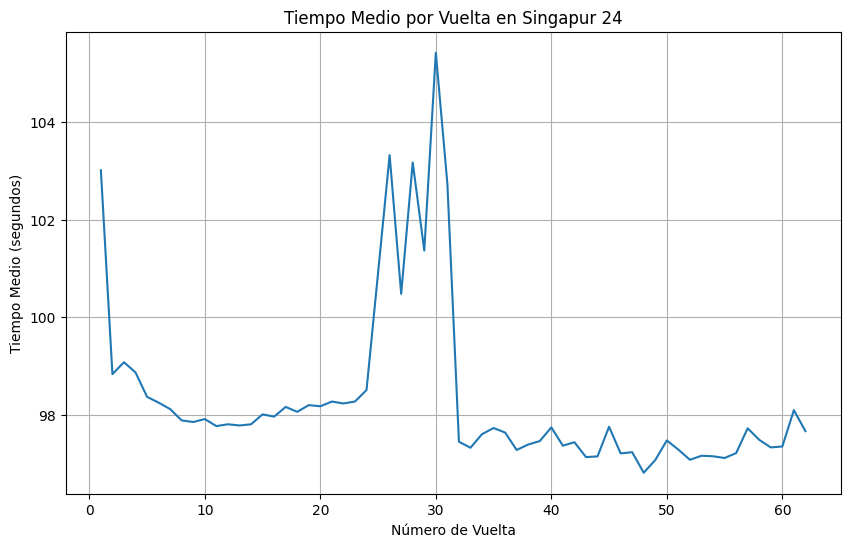

In [15]:

# aquí es donde nos aseguramos de que cada vuelta sale solo una vez
mean_lap_time = f1.groupby('LapNumber')['LapTime'].mean()

# Gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_lap_time.index, y=mean_lap_time)
plt.title('Tiempo Medio por Vuelta en Singapur 24')
plt.xlabel('Número de Vuelta')
plt.ylabel('Tiempo Medio (segundos)')
plt.grid(True)
plt.show()

Aprovechando el parámetro `hue`

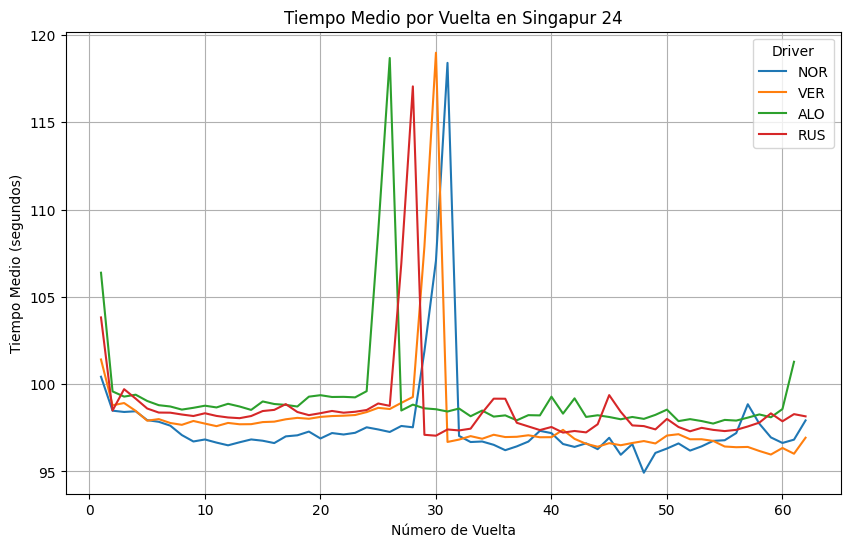

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=f1, x="LapNumber", y="LapTime",hue="Driver")
plt.title('Tiempo Medio por Vuelta en Singapur 24')
plt.xlabel('Número de Vuelta')
plt.ylabel('Tiempo Medio (segundos)')
plt.grid(True)
plt.show()

### 1.3 Diagrama de densidad

Muy útiles porque  a veces los puntos se tapan unos a otros, nos permiten ver dónde hay más puntos acumulados.

**matplotlib**

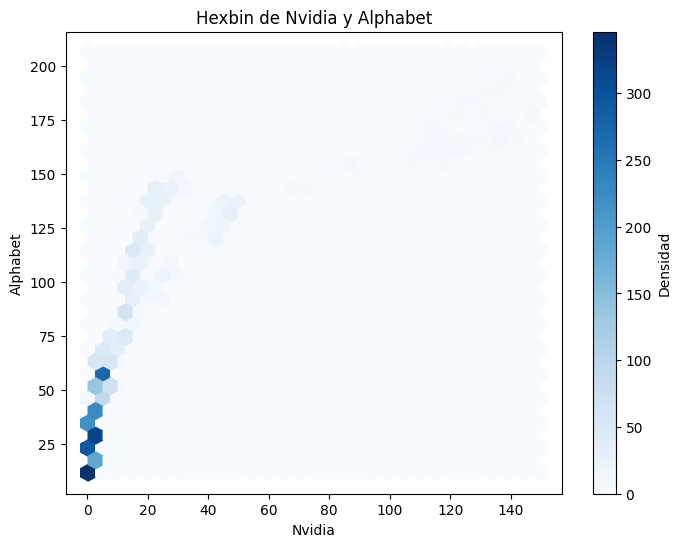

In [17]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Nvidia'], df['Alphabet'], gridsize=30, cmap='Blues')
plt.colorbar(label='Densidad')
plt.title('Hexbin de Nvidia y Alphabet')
plt.xlabel('Nvidia')
plt.ylabel('Alphabet')
plt.show()

**seaborn**

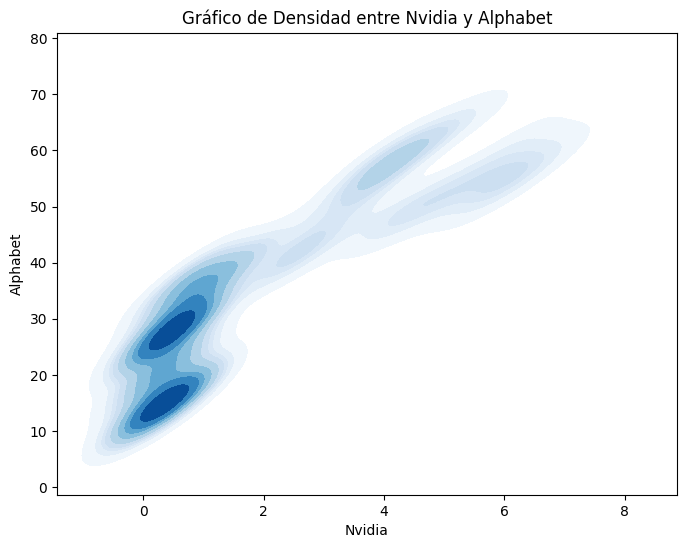

In [18]:
import seaborn as sns

# Gráfico de densidad para ver la relación entre BBVA y Santander
plt.figure(figsize=(8, 6))
sns.kdeplot(x='Nvidia', y='Alphabet', data=df[df.Year<2020], fill=True, cmap="Blues")
plt.title('Gráfico de Densidad entre Nvidia y Alphabet')
plt.xlabel('Nvidia')
plt.ylabel('Alphabet')
plt.show()

## 2. Gráficas con dos variables discretas
---

Cuando hay dos variables discretas solemos representar frecuencias. Esto implica a menudo una preparación de datos haciendo agrupaciones

### 2.1 Diagrama de barras

Hay versiones para combinar dos variables discretas, ya sea apilando o poniendo al lado

In [19]:
import pandas as pd
import seaborn as sns
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/pokemon.csv"
df_pokemon = pd.read_csv(url)
df_pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [20]:
counts = df_pokemon.groupby(['Type 1', 'Legendary']).size().reset_index(name='Proporción')

# Crear la gráfica de barras apiladas con proporciones
fig = px.bar(counts, x='Type 1', y='Proporción', color='Legendary', barmode='relative',
              title='Proporción de Pokémon Legendarios por Tipo')

# Mostrar la gráfica
fig.show()

In [21]:
counts

,Type 1,Legendary,Proporción
0,Bug,False,69
1,Dark,False,29
2,Dark,True,2
3,Dragon,False,20
4,Dragon,True,12
5,Electric,False,40
6,Electric,True,4
7,Fairy,False,16
8,Fairy,True,1
9,Fighting,False,27


### 2.2 Mapas de calor

Muy útiles para comparar las frecuencias de dos variables discretas

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


url = "https://ucmdrive.ucm.es/s/CdiF2EP3Z3MaTx7/download/ventas.zip"
df_ventas = pd.read_csv(url)
#df_ventas.columns

HTTPError: HTTP Error 404: Not Found

In [ ]:
df_ventas.columns

Index(['N.Mes', 'MES', 'CENTRO', 'COD.AREA', 'AREA', 'COD.SEC', 'SECCION',
       'COD.CAT', 'CATEGORIA', 'COD.SUBCAT', 'SUBCATEGORIA', 'COD.SEG',
       'SEGMENTO', 'REF.CENTRAL', 'REF.CENTER', 'DESCRIPCION', 'VTA.OFERTA',
       'VTA.OFERTA.AA', 'VENTAS', 'VENTAS.AA', 'PESO.OFERTA.AA', 'UDS',
       'UDS.AA', 'AVERIADO', 'AVERIADO.AA', 'UDS.AVERIADO', 'UDS.AVERIADO.AA',
       'STOCK', 'STOCK.AA', 'UDS.STOCK', 'UDS.STOCK.AA'],
      dtype='object')

In [ ]:
filtro = df_ventas.SECCION == "BEBIDAS"
df_bebidas = df_ventas[filtro]

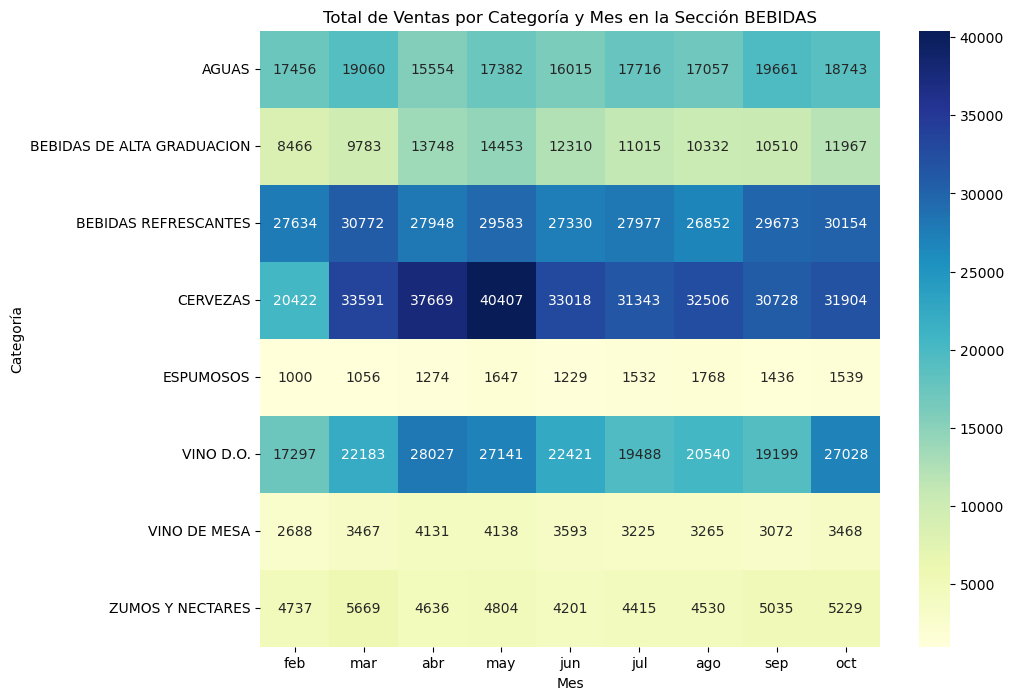

In [ ]:
ventas_por_categoria_mes = df_bebidas.groupby(['CATEGORIA', 'MES','N.Mes'])['VENTAS'].sum().reset_index()
ventas_por_categoria_mes = ventas_por_categoria_mes.sort_values('N.Mes')

# Formato ancho
ventas_pivot = ventas_por_categoria_mes.pivot(index='CATEGORIA', columns='N.Mes', values='VENTAS')
ventas_pivot.columns = ventas_por_categoria_mes.drop_duplicates(subset=['N.Mes'])['MES']

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ventas_pivot, annot=True, fmt=".0f", cmap="YlGnBu")

# Añadir título y etiquetas
plt.title('Total de Ventas por Categoría y Mes en la Sección BEBIDAS')
plt.xlabel('Mes')
plt.ylabel('Categoría')
plt.show()

In [ ]:
ventas_por_categoria_mes

,CATEGORIA,MES,N.Mes,VENTAS
56,VINO DE MESA,feb,2,2688
65,ZUMOS Y NECTARES,feb,2,4737
29,CERVEZAS,feb,2,20422
11,BEBIDAS DE ALTA GRADUACION,feb,2,8466
38,ESPUMOSOS,feb,2,1000
...,...,...,...,...
70,ZUMOS Y NECTARES,oct,10,5229
34,CERVEZAS,oct,10,31904
25,BEBIDAS REFRESCANTES,oct,10,30154
16,BEBIDAS DE ALTA GRADUACION,oct,10,11967


In [ ]:
ventas_pivot

MES,feb,mar,abr,may,jun,jul,ago,sep,oct
CATEGORIA,,,,,,,,,
AGUAS,17456,19060,15554,17382,16015,17716,17057,19661,18743
BEBIDAS DE ALTA GRADUACION,8466,9783,13748,14453,12310,11015,10332,10510,11967
BEBIDAS REFRESCANTES,27634,30772,27948,29583,27330,27977,26852,29673,30154
CERVEZAS,20422,33591,37669,40407,33018,31343,32506,30728,31904
ESPUMOSOS,1000,1056,1274,1647,1229,1532,1768,1436,1539
VINO D.O.,17297,22183,28027,27141,22421,19488,20540,19199,27028
VINO DE MESA,2688,3467,4131,4138,3593,3225,3265,3072,3468
ZUMOS Y NECTARES,4737,5669,4636,4804,4201,4415,4530,5035,5229


## 3. Gráficas con una variable discreta y otra continua
---

En este caso la biblioteca Seaborn nos da muchas posibilidades que añaden a los gráficos de variables continuas la posibilidad de distinguirse por una variable categórica

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/pokemon.csv"
df_pokemon = pd.read_csv(url)
df_pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


### 3.1 Gráficos de enjambre


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/f1-Singapur24.csv"
f1 = pd.read_csv(url)
f1

,Driver,LapTime,LapNumber,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedST,Compound,TyreLife,Team,Position,Deleted,DeletedReason,FastF1Generated
0,NOR,100.424,1.0,0,NaN,41.379,27.852,186.0,MEDIUM,1.0,McLaren,1.0,False,NaN,False
1,NOR,98.480,2.0,0,29.268,41.412,27.800,276.0,MEDIUM,2.0,McLaren,1.0,False,NaN,False
2,NOR,98.406,3.0,0,29.354,41.262,27.790,270.0,MEDIUM,3.0,McLaren,1.0,False,NaN,False
3,NOR,98.446,4.0,0,29.399,41.305,27.742,272.0,MEDIUM,4.0,McLaren,1.0,False,NaN,False
4,NOR,97.938,5.0,0,29.034,41.159,27.745,278.0,MEDIUM,5.0,McLaren,1.0,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,RUS,97.796,58.0,0,28.659,41.835,27.302,290.0,HARD,31.0,Mercedes,4.0,False,NaN,False
243,RUS,98.326,59.0,0,28.785,42.103,27.438,289.0,HARD,32.0,Mercedes,4.0,False,NaN,False
244,RUS,97.872,60.0,0,28.765,41.920,27.187,NaN,HARD,33.0,Mercedes,4.0,True,TRACK LIMITS AT TURN 19 LAP 60,False
245,RUS,98.282,61.0,0,29.034,41.976,27.272,287.0,HARD,34.0,Mercedes,4.0,False,NaN,False


<Axes: xlabel='Driver', ylabel='LapTime'>

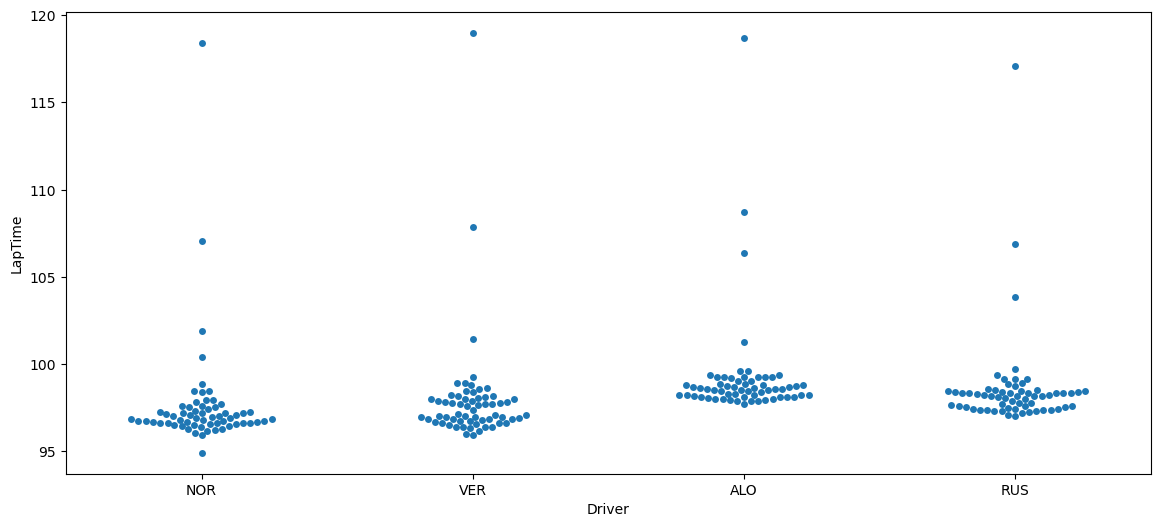

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, eje = plt.subplots(figsize=(14, 6))
sns.swarmplot(data=f1, x="Driver", y="LapTime",ax=eje)

<Axes: xlabel='Driver', ylabel='LapTime'>

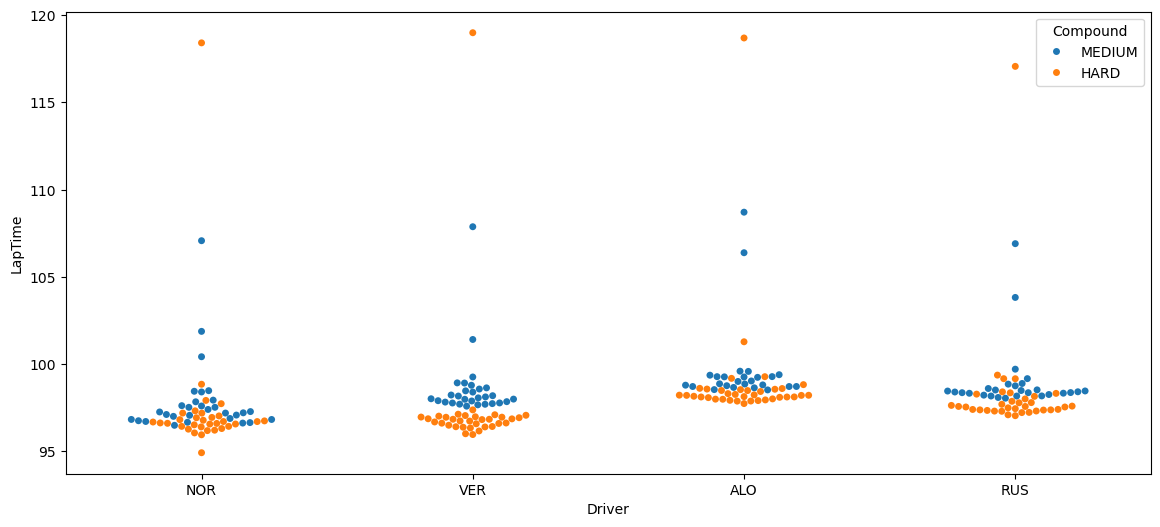

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, eje = plt.subplots(figsize=(14, 6))
sns.swarmplot(data=f1, x="Driver", y="LapTime", hue="Compound",ax=eje)

### 3.2 Gráficos de violín

Una alternativa a los boxplots

- Punto blanco: mediana
- Línea negra: rango intercuartílico
- Anchura: densidad de probabilidad
- Todo lo largo que sea necesario para incluir toodos los puntos

<Axes: xlabel='Driver', ylabel='LapTime'>

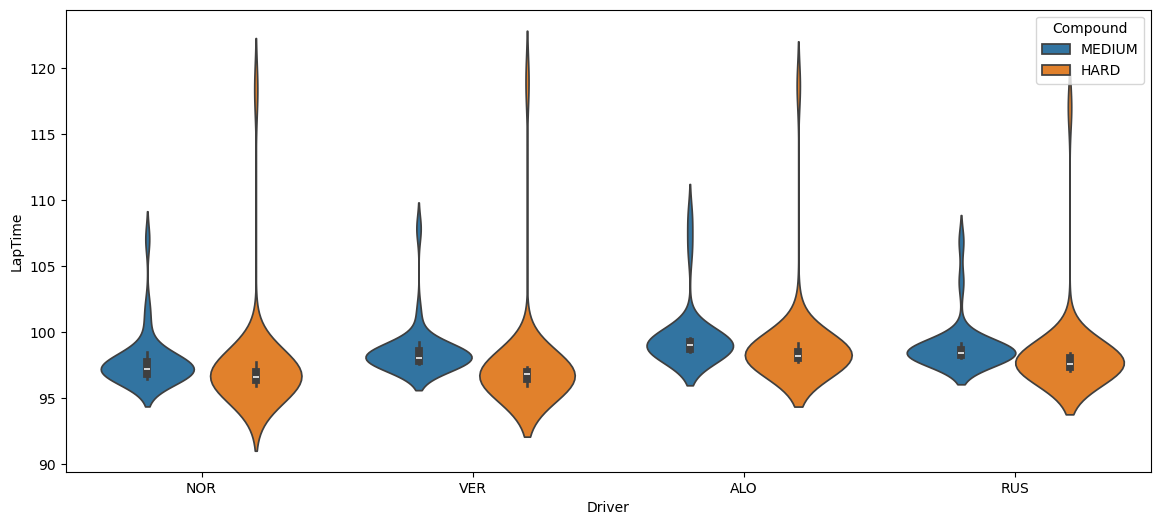

In [ ]:
import seaborn as sns
fig, eje = plt.subplots(figsize=(14, 6))
sns.violinplot(data=f1, x="Driver", y="LapTime", hue="Compound",  ax=eje)

### 3.3 Diagramas de barras con IC

Supongamos que, en `df_ventas` queremos obtener un diagrama de VENTAS por N.Mes con intervalo de confianza del 90% forma rápida. Decididmos usar la fórmula:

$$\mu \pm  Z \frac{\sigma}{\sqrt{n}}$$

para las ventas de cada mes por separado

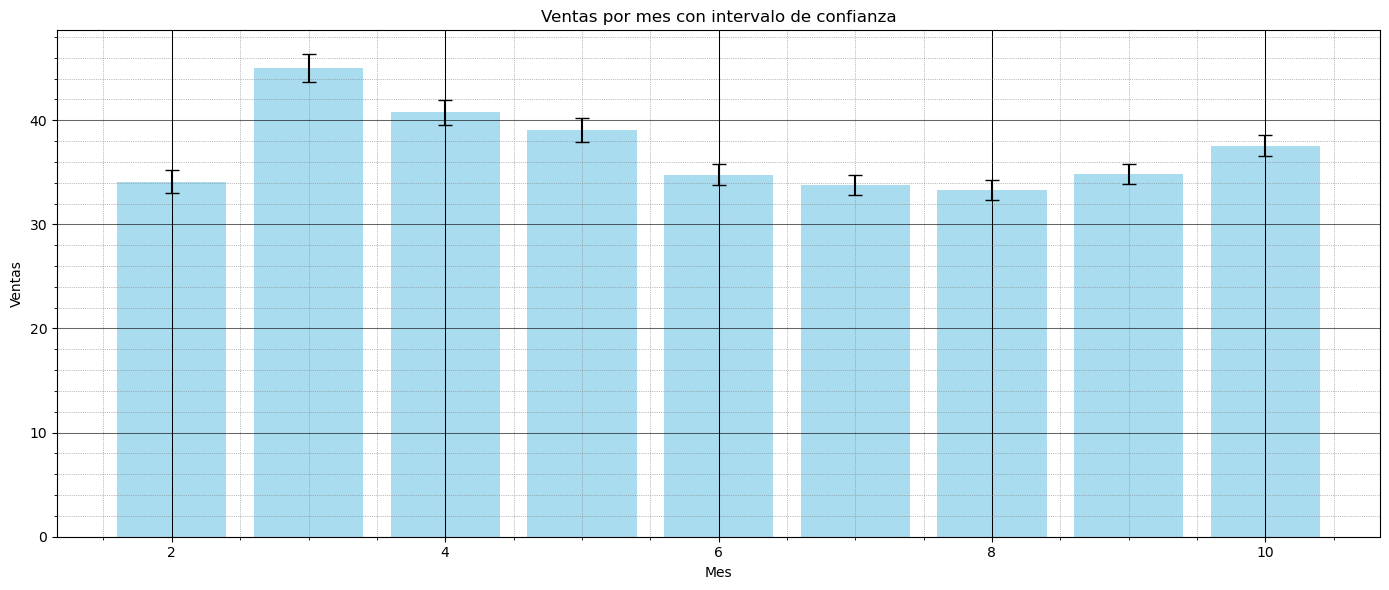

In [ ]:

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

ci = 90
z = norm.ppf(1 - (1 - ci / 100) / 2)  # es feo, sí, pero así se obtiene z

# Agrupamos las ventas por meses
summary = df_ventas.groupby(['N.Mes'])['VENTAS'].agg(['mean', 'count', 'std'])

# Ahora obtenemos el error que usaremos para el intervalo de confianza
summary['error'] = z * (summary['std'] / np.sqrt(summary['count'])) # teorema entral del límite

# Preparar datos para el gráfico
meses  = summary.index
means = summary['mean']
errors = summary['error']

# Crear el diagrama de barras
fig, ax = plt.subplots(figsize=(14, 6))
plt.bar(meses, means, yerr=errors, capsize=5, alpha=0.7, color='skyblue')
plt.ylabel('Ventas')
plt.xlabel('Mes')
plt.title('Ventas por mes con intervalo de confianza')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.grid(True)
# Personalizar el grid
ax.grid(which='major', color='black', linestyle='-', linewidth=0.75)  # Rejilla principal
ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)    # Rejilla secundaria

# Añadir ticks secundarios
ax.minorticks_on()

# Mostrar el gráfico
plt.show()

## 4. Correlaciones
---

### 4.1 Introducción

Hasta ahora hemos considerado cada columna (cada variable) de forma independiente, viendo histogramas, outliers, etc. de forma individual. Solo hemos comparado columnas por ejemplo al hablar de los tests que nos permiten ver si tienen la misma media o si son muestras de la misma variable.

Ahora vamos a estudiar la *correlación* entre las columnas por pares. La idea es ver si dos variables tienen *relación lineal*: si cuando una crece la otra en general también (correlación positiva) o si cuando una crece la otra decrece (correlación negativa).

Una correlación alta indica que las variables están muy relacionadas (contienen información muy similar). Esto implica:

- Si una de las variables es una variable a predecir se podrá hacer muy bien a partir de la otra (por ejemplo con regresión lineal)

- Si las dos variables son características de un objeto puede que nos interese quitar una porque estamos "reforzando" o "duplicando" la misma información y eso puede tener influencia negativa en algunos métodos de aprendizaje automático.

### 4.2 Definición

Para estudiar la correlación entre dos variables se suele utilizar el *coeficiente de correlación de Pearson*

$$
r = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sum(x_i - \overline{x})^2(y_i - \overline{y})^2}
$$

Es un valor que está entre -1 y +1. Algunos ejemplos:


<img src="https://www.statlect.com/images/linear-correlation-coefficient.png" />

### 4.3 Ejemplo

Por fortuna no tenemos que calcular las correlaciones; Pandas ya incluye un método [df.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

Supongamos que queremos saber qué dos comunidades tienen mayor correlación en sus datos de paro

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/parocomunidades.csv"


df = pd.read_csv(url, encoding="latin1")
df

,Comunidad,Periodo,Total
0,Andalucía,2023,18.67
1,Andalucía,2022,19.00
2,Andalucía,2021,20.18
3,Andalucía,2020,22.74
4,Andalucía,2019,20.80
...,...,...,...
413,Melilla,2006,9.86
414,Melilla,2005,12.33
415,Melilla,2004,12.49
416,Melilla,2003,19.88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Comunidad  418 non-null    object 
 1   Periodo    418 non-null    int64  
 2   Total      418 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


In [ ]:
df.Comunidad.unique()

array([' Andalucía', ' Aragón', ' Asturias, Principado de',
       ' Balears, Illes', ' Canarias', ' Cantabria', ' Castilla y León',
       ' Castilla - La Mancha', ' Cataluña', ' Comunitat Valenciana',
       ' Extremadura', ' Galicia', ' Madrid, Comunidad de',
       ' Murcia, Región de', ' Navarra, Comunidad Foral de',
       ' País Vasco', ' Rioja, La', ' Ceuta', ' Melilla'], dtype=object)

In [ ]:
df["Comunidad"] = df["Comunidad"].str.strip()
df.Comunidad.unique()

array(['Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes',
       'Canarias', 'Cantabria', 'Castilla y León', 'Castilla - La Mancha',
       'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia',
       'Madrid, Comunidad de', 'Murcia, Región de',
       'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La', 'Ceuta',
       'Melilla'], dtype=object)

In [ ]:
df.Periodo.unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002],
      dtype=int64)

Vaya...las correlaciones se calculan entre columnas, así que las comunidades deberían ser columnas, ¿qué hacer?

In [ ]:
df_ancho = df.pivot(index='Periodo', columns='Comunidad', values='Total')
df_ancho.style.background_gradient(cmap='Blues')

Comunidad,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla - La Mancha,Castilla y León,Cataluña,Ceuta,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de",Melilla,"Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
Periodo,,,,,,,,,,,,,,,,,,,
2002,20.150000,6.540000,10.120000,8.690000,11.320000,10.580000,9.850000,10.150000,10.610000,5.700000,10.710000,18.910000,11.890000,6.990000,3.570000,11.450000,5.580000,9.640000,5.650000
2003,18.350000,6.530000,10.140000,10.010000,12.040000,10.420000,9.800000,11.020000,9.720000,9.650000,10.680000,17.140000,13.460000,7.160000,19.880000,10.760000,6.160000,9.930000,6.750000
2004,15.990000,5.560000,10.240000,8.090000,10.750000,11.100000,10.200000,10.480000,9.320000,6.590000,10.110000,17.650000,12.470000,6.950000,12.490000,9.960000,5.140000,9.260000,4.680000
2005,13.800000,5.760000,9.300000,7.500000,10.880000,8.010000,9.420000,8.530000,6.630000,17.140000,8.130000,15.160000,9.140000,5.900000,12.330000,7.430000,5.920000,6.450000,6.690000
2006,12.220000,4.990000,9.090000,6.340000,11.370000,5.870000,8.050000,7.580000,6.560000,14.440000,8.480000,12.940000,7.880000,6.460000,9.860000,7.850000,4.590000,6.920000,6.880000
2007,13.960000,5.120000,8.000000,9.350000,10.890000,4.720000,8.100000,6.940000,6.500000,20.180000,8.940000,14.790000,7.460000,6.400000,17.430000,8.250000,4.280000,5.900000,5.880000
2008,21.660000,9.710000,10.000000,12.050000,20.990000,8.810000,15.040000,11.400000,11.750000,15.660000,14.580000,18.110000,9.640000,10.020000,16.170000,15.290000,8.130000,8.480000,9.800000
2009,26.270000,13.570000,14.130000,19.450000,26.770000,12.700000,19.290000,14.210000,16.900000,24.010000,22.090000,21.210000,12.800000,14.480000,19.870000,21.840000,10.510000,12.130000,13.760000
2010,28.040000,16.290000,16.610000,21.780000,28.780000,14.670000,21.720000,15.780000,17.860000,24.830000,22.570000,23.950000,15.620000,15.540000,24.460000,24.450000,11.770000,10.980000,15.580000


In [ ]:
correlaciones = df_ancho.corr()
correlaciones.style.background_gradient(cmap='Blues')

Comunidad,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla - La Mancha,Castilla y León,Cataluña,Ceuta,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de",Melilla,"Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
Comunidad,,,,,,,,,,,,,,,,,,,
Andalucía,1.000000,0.974438,0.935076,0.882329,0.950943,0.943026,0.978451,0.976321,0.977161,0.664595,0.973430,0.956982,0.941868,0.964098,0.757572,0.977883,0.932751,0.958110,0.935199
Aragón,0.974438,1.000000,0.933461,0.912394,0.979871,0.909659,0.979796,0.949704,0.967278,0.747802,0.981021,0.926415,0.896928,0.982615,0.795592,0.979974,0.956237,0.915070,0.967467
"Asturias, Principado de",0.935076,0.933461,1.000000,0.811519,0.881085,0.924761,0.956269,0.936488,0.928906,0.743512,0.923969,0.920654,0.917931,0.948902,0.782781,0.942522,0.949333,0.922618,0.916546
"Balears, Illes",0.882329,0.912394,0.811519,1.000000,0.923011,0.840442,0.867312,0.855013,0.936419,0.625373,0.943036,0.804539,0.802558,0.892326,0.637508,0.906634,0.862482,0.808350,0.914982
Canarias,0.950943,0.979871,0.881085,0.923011,1.000000,0.866115,0.961665,0.915720,0.951356,0.728985,0.975377,0.895197,0.836303,0.969435,0.783894,0.964323,0.934685,0.866692,0.956168
Cantabria,0.943026,0.909659,0.924761,0.840442,0.866115,1.000000,0.931307,0.962387,0.934553,0.577448,0.911723,0.927020,0.967339,0.899064,0.714609,0.915821,0.892506,0.946806,0.865299
Castilla - La Mancha,0.978451,0.979796,0.956269,0.867312,0.961665,0.931307,1.000000,0.962040,0.958213,0.736938,0.968242,0.964226,0.921418,0.977492,0.818330,0.973044,0.950417,0.929923,0.941982
Castilla y León,0.976321,0.949704,0.936488,0.855013,0.915720,0.962387,0.962040,1.000000,0.965602,0.601029,0.947406,0.944394,0.973134,0.929841,0.734806,0.959600,0.898780,0.972639,0.921528
Cataluña,0.977161,0.967278,0.928906,0.936419,0.951356,0.934553,0.958213,0.965602,1.000000,0.621999,0.983911,0.922818,0.924751,0.952370,0.689874,0.979910,0.920724,0.946270,0.940601



### 4.4 A tener en cuenta

En el caso de las correlaciones (como en todos) no hay que precipitarse en sacar conclusiones. En particular:

- Que haya correlación no significa que los valores sean "parecidos" sino que se mueven a la vez (en la misma dirección o contraria)

- Correlación no implica causalidad, en ocasiones puede haber otra variable que esté "moviendo" las dos variables correlaciones

- Ya hemos visto que puede haber correlación de otros tipos que no está detectada por nuestro método (la correlación de Pearson); pero es que también sucede al revés, podemos encontrar correlación y que no signifique lo que creemos:

<img src="https://github.com/RafaelCaballero/tdm/raw/master/images/Situations-in-which-linear-correlation-should-not-be-used-a-two-variables-have-a.png" />

Vamos a mostrar los gráficos de dos comunidades muy relacionadas


In [ ]:
df_ancho.columns

Index(['Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes',
       'Canarias', 'Cantabria', 'Castilla - La Mancha', 'Castilla y León',
       'Cataluña', 'Ceuta', 'Comunitat Valenciana', 'Extremadura', 'Galicia',
       'Madrid, Comunidad de', 'Melilla', 'Murcia, Región de',
       'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La'],
      dtype='object', name='Comunidad')

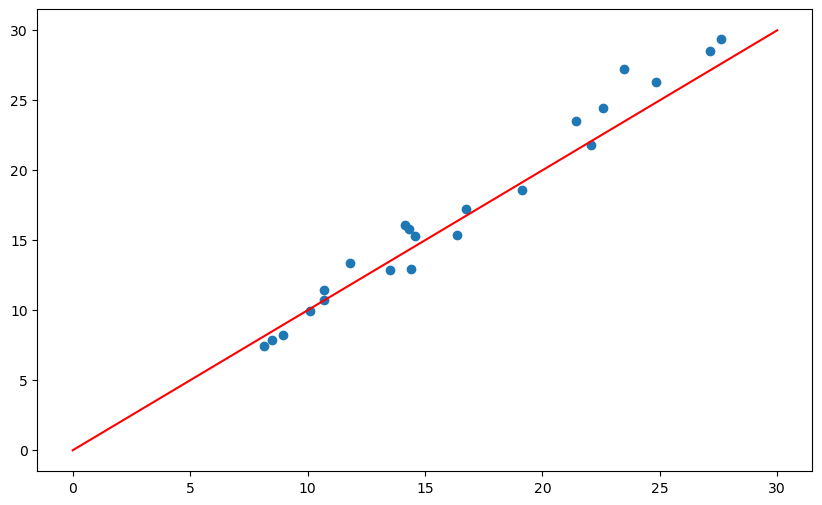

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_ancho["Comunitat Valenciana"],df_ancho['Murcia, Región de'])
ax.plot([0,30],[0,30],color="red")
plt.show()

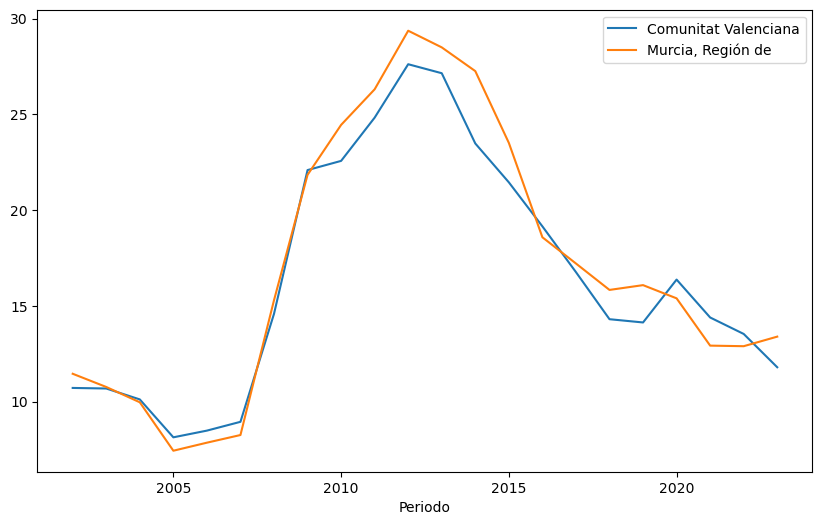

In [ ]:
# otra forma
fig, ax = plt.subplots(figsize=(10, 6))
cs = ["Comunitat Valenciana",'Murcia, Región de']
for c in cs:
    df_ancho[c].plot(ax=ax,label=c)
ax.legend()
plt.show()

### 4.5 Representación gráfica

**Seaborn**

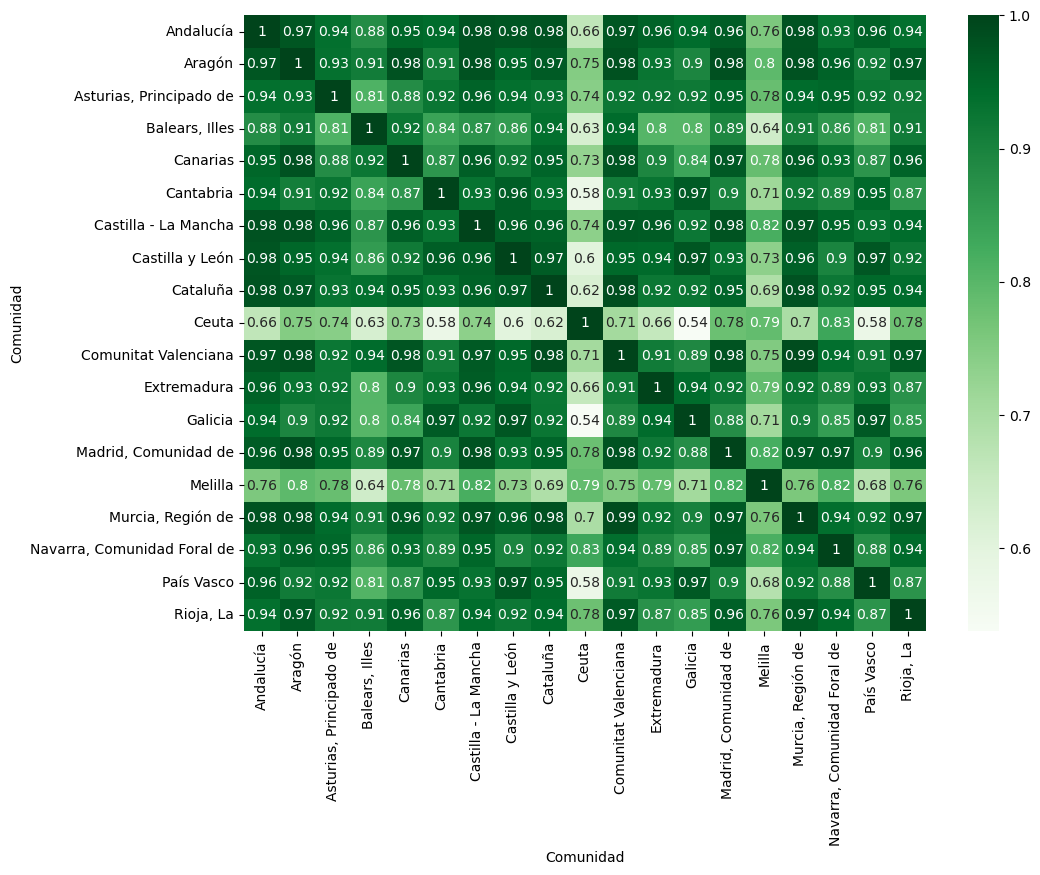

In [ ]:
import seaborn as sns
plt.figure(figsize=(11,8))
sns.heatmap(correlaciones, cmap="Greens",annot=True)
plt.show()

Hay otras posibilidades más complejas que por ejemplo crean grupos (clústers) de atributos correlacionados

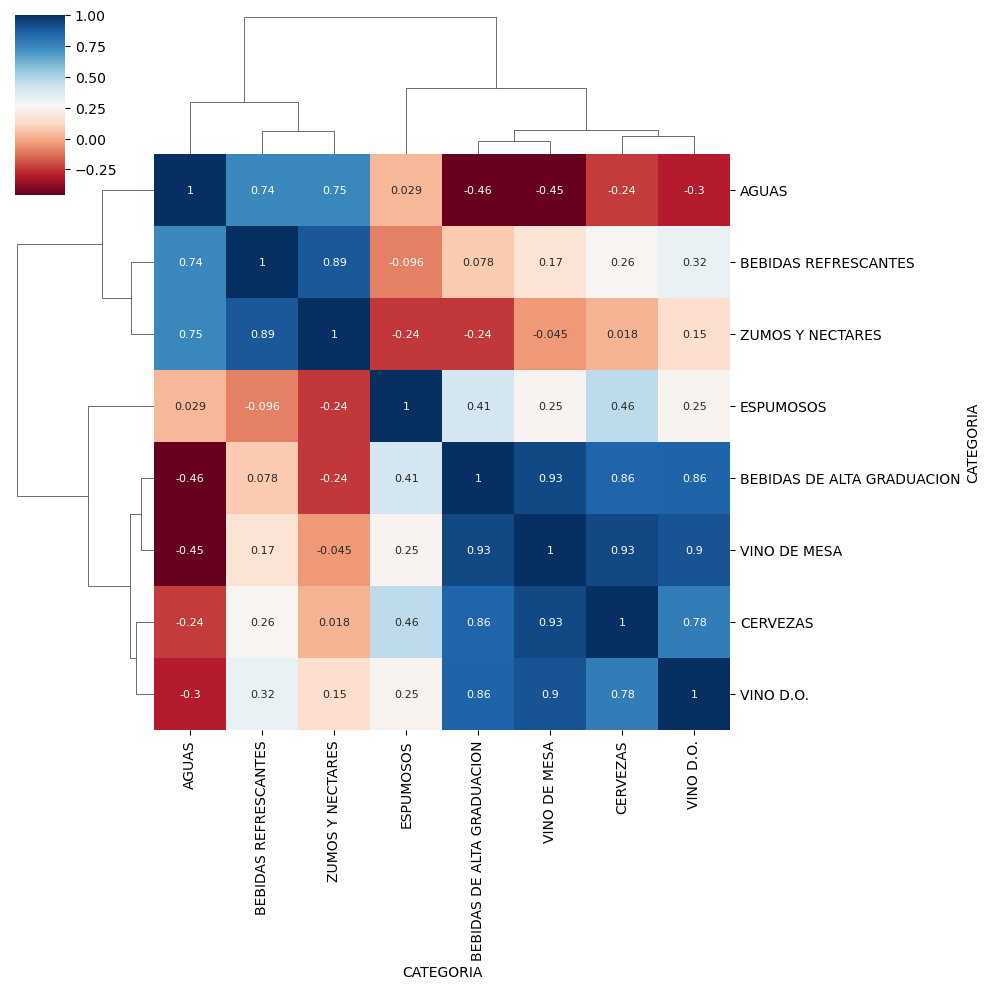

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.clustermap(ventas_pivot.T.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})

### 4.6 Variables nominales

Si una variable es categórica vamos a tener dos posibilidades:

a) Convertir la variable a numérica (one-hot-encoding)

b) Utilizar un test como de la $\chi^2$ (en otra clase posterior)

Ejemplo:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/pokemon.csv"
df_pokemon = pd.read_csv(url)[["Type 1","Attack", "Defense", "Speed","Legendary"]].dropna()
df_pokemon

,Type 1,Attack,Defense,Speed,Legendary
0,Grass,49,49,45,False
1,Grass,62,63,60,False
2,Grass,82,83,80,False
3,Grass,100,123,80,False
4,Fire,52,43,65,False
...,...,...,...,...,...
795,Rock,100,150,50,True
796,Rock,160,110,110,True
797,Psychic,110,60,70,True
798,Psychic,160,60,80,True


Antes de aplicar el método one-hot-encoding, vamos a dejar el mismo tipo de Pokemon de cada tipo, tener clases categóricas poco equilibrada podría confundir al método


In [ ]:
df2 = df_pokemon  #.groupby('Type 1', group_keys=False).sample(n=df_pokemon["Type 1"].value_counts().min())
pok = pd.get_dummies(df2[["Type 1","Defense","Speed"]])


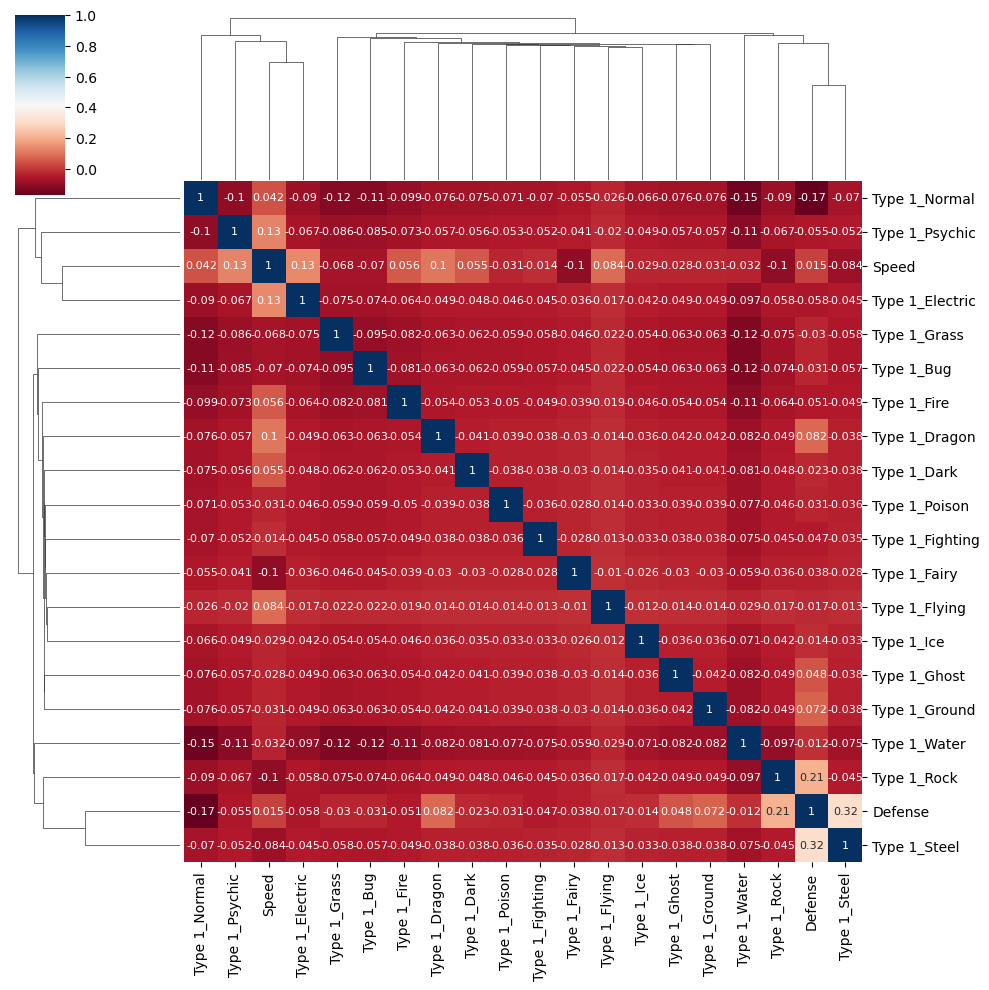

In [ ]:
g = sns.clustermap(pok.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})

fig =g.figure
fig.savefig('pokemon.pdf')

En el caso de las variables dummy las correlaciones suelen ser pequeñas, pero aun así son indicativas, así vemos que los poquemos de tipo 'Steel' y 'Rock' parecen tener más defensa. Ahora podemos confirmarlo

In [ ]:
df2.groupby('Type 1')['Defense'].mean()

Type 1
Bug          70.724638
Dark         70.225806
Dragon       86.375000
Electric     66.295455
Fairy        65.705882
Fighting     65.925926
Fire         67.769231
Flying       66.250000
Ghost        81.187500
Grass        70.800000
Ground       84.843750
Ice          71.416667
Normal       59.846939
Poison       68.821429
Psychic      67.684211
Rock        100.795455
Steel       126.370370
Water        72.946429
Name: Defense, dtype: float64

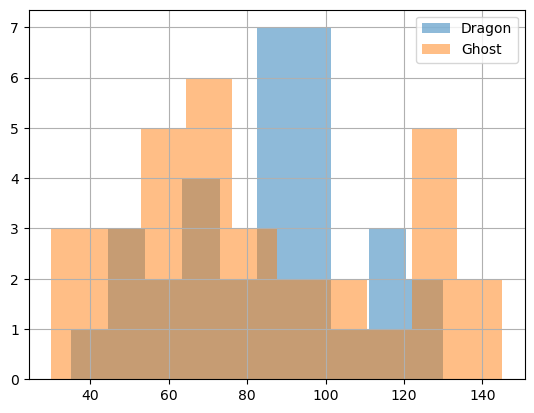

In [ ]:
df_aux = df_pokemon[df_pokemon['Type 1']=="Dragon"]
df_aux.Defense.hist(label="Dragon",alpha=0.5)
df_aux = df_pokemon[df_pokemon['Type 1']=="Ghost"]
df_aux.Defense.hist(label="Ghost",alpha=0.5)
plt.legend()
plt.show()

## 5. Referencias
---

[Gráficos en Python](https://python-graph-gallery.com/)<br>

[Variables categóricas en Seaborn](https://seaborn.pydata.org/tutorial/categorical.html)<br>

Una explicación matemática sencilla de donde he tomado alguna imagen:
*Taboga, Marco (2021). "Linear correlation", Lectures on probability theory and mathematical statistics. Kindle Direct Publishing. Online appendix.* https://www.statlect.com/fundamentals-of-probability/linear-correlation.



Sobre correlación y causalidad:
 [Why correlation does not imply causation?](https://medium.com/@seema.singh/why-correlation-does-not-imply-causation-5b99790df07e)



Descripción de los distintos tipos de tests para variables categóricas y numéricas:
*Data Preprocessing in Data Mining*. Intelligent Systems Reference Library №72. Salvador García, Julián Luengo, Francisco Herrera. Spring, 2015.  Ver en particular: *3.2.1 Finding Redundant Attributes*
